In [2]:
import pandas as pd

# Read the CSV files into DataFrames
df_democratic = pd.read_csv('/content/drive/MyDrive/PP24_AllPrecinctsDemocratic.csv')
df_non_partisan = pd.read_csv('/content/drive/MyDrive/PP24_AllPrecinctsNon-partisian.csv')
df_republican = pd.read_csv('/content/drive/MyDrive/PP24_AllPrecinctsRepublican.csv')

# Now let's check for the column names in each dataset to ensure proper combination
df_democratic.columns, df_non_partisan.columns, df_republican.columns

# Since all datasets share similar column names, the concatenation should be correct.
# Concatenate the three DataFrames into combined_df
combined_df = pd.concat([df_democratic, df_non_partisan, df_republican], ignore_index=True)

# Re-displaying the combined data for clarity
combined_df.head()

,County,County Name,Election District - Precinct,Congressional,Legislative,Office Name,Office District,Candidate Name,Party,Winner,Early Votes,Election Night Votes,Mail-In Ballot 1 Votes,Provisional Votes,Mail-In Ballot 2 Votes
0,1,Allegany County,001-000,6,01C,President - Vice Pres,NaN,Joe Biden,DEM,Y,3,6,11,5,0
1,1,Allegany County,001-000,6,01C,President - Vice Pres,NaN,Dean Phillips,DEM,NaN,0,1,0,0,0
2,1,Allegany County,001-000,6,01C,President - Vice Pres,NaN,Marianne Williamson,DEM,NaN,0,0,0,0,0
3,1,Allegany County,001-000,6,01C,President - Vice Pres,NaN,Uncommitted to any Presidential Candidate,DEM,NaN,0,3,2,0,0
4,1,Allegany County,001-000,6,01C,President - Vice Pres,06,Joe Biden,DEM,Y,3,6,11,5,0


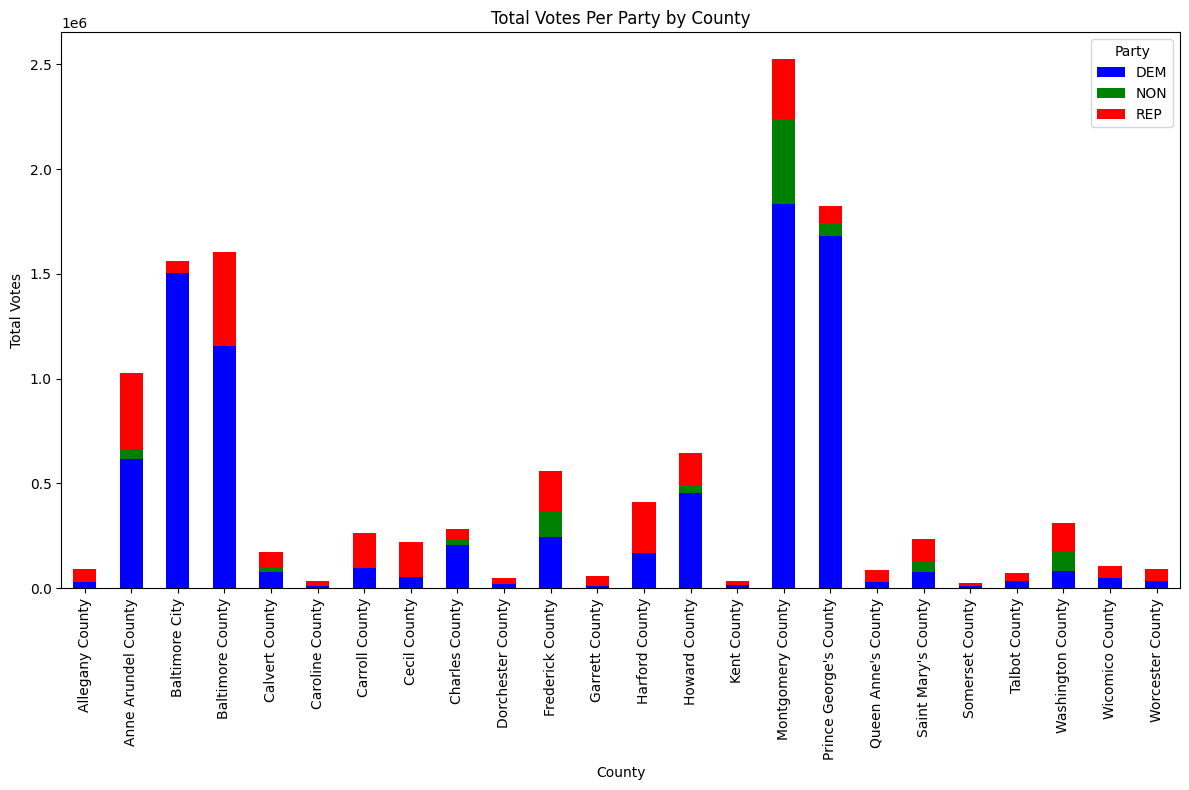

In [4]:
# Create the same bar chart but with specific colors for each party
party_colors = {
    'DEM': 'blue',
    'REP': 'red',
    'NON': 'green'  # Assuming 'Non-partisan' is abbreviated as 'NON'
}

# Plot with specified colors
votes_by_party_county.plot(kind='bar', stacked=True, figsize=(12, 8), color=[party_colors.get(col, 'gray') for col in votes_by_party_county.columns])
plt.title("Total Votes Per Party by County")
plt.ylabel("Total Votes")
plt.xlabel("County")
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot with specified colors
plt.show()


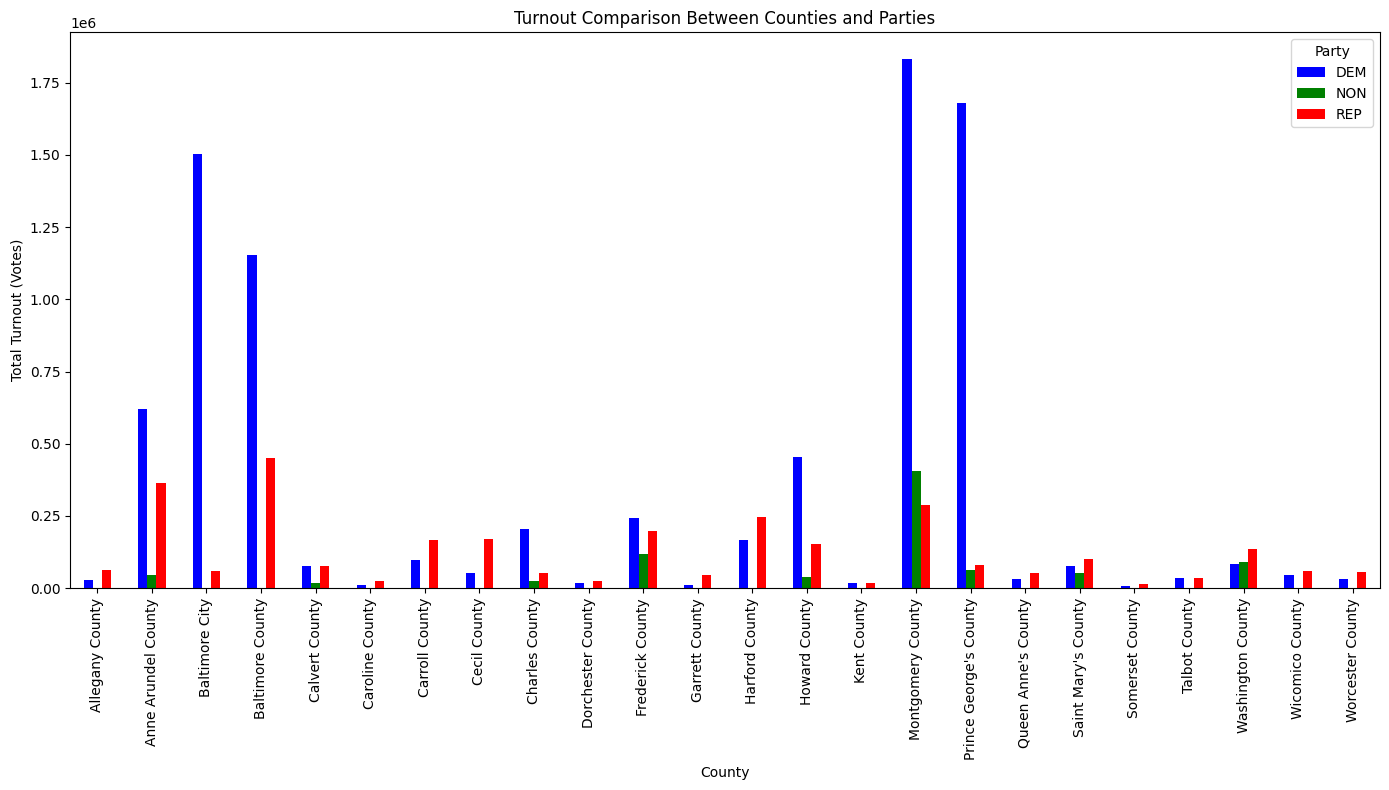

In [5]:
# Create a new DataFrame that summarizes total votes by county and party
turnout_by_county_party = combined_df.groupby(['County Name', 'Party'])['Total Votes'].sum().unstack()

# Plot the comparison of turnout between counties and parties
turnout_by_county_party.plot(kind='bar', figsize=(14, 8), color=[party_colors.get(col, 'gray') for col in turnout_by_county_party.columns])
plt.title("Turnout Comparison Between Counties and Parties")
plt.ylabel("Total Turnout (Votes)")
plt.xlabel("County")
plt.xticks(rotation=90)
plt.legend(title="Party")
plt.tight_layout()

# Show the comparison chart
plt.show()


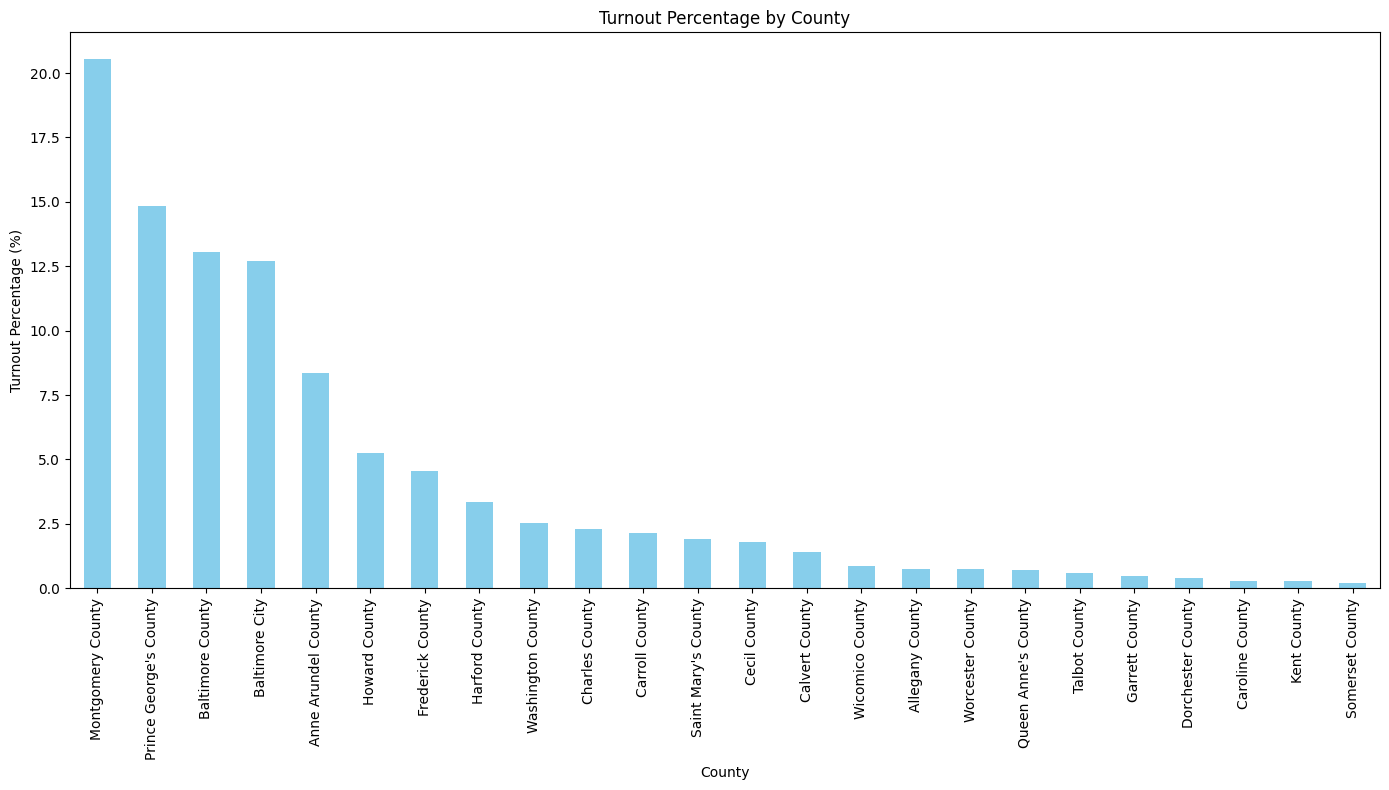

In [6]:
# Calculate total votes per county across all parties
total_votes_per_county = combined_df.groupby('County Name')['Total Votes'].sum()

# Calculate turnout percentage for each county
turnout_percentage_by_county = (total_votes_per_county / total_votes_per_county.sum()) * 100

# Plot the turnout percentage by county
plt.figure(figsize=(14, 8))
turnout_percentage_by_county.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Turnout Percentage by County")
plt.ylabel("Turnout Percentage (%)")
plt.xlabel("County")
plt.xticks(rotation=90)
plt.tight_layout()

# Show the chart
plt.show()


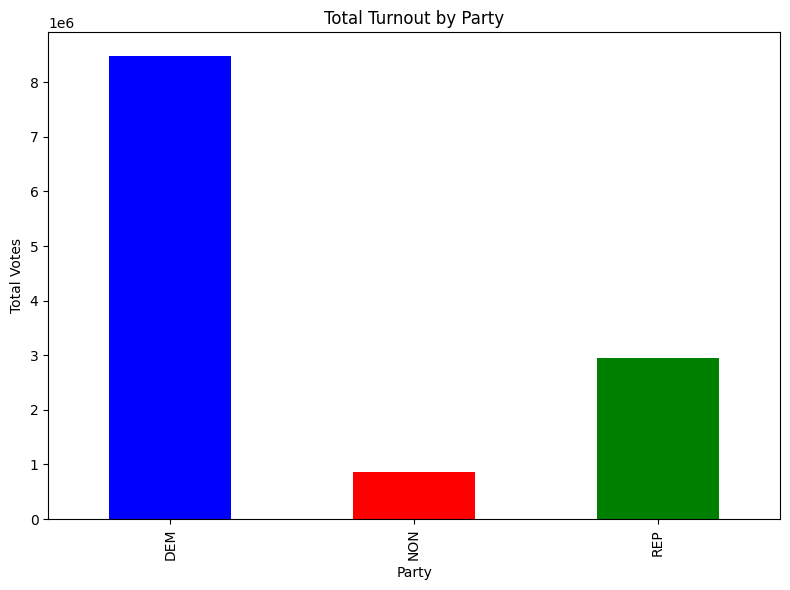

In [7]:
# Calculate total votes for each party across all counties
total_votes_by_party = combined_df.groupby('Party')['Total Votes'].sum()

# Plot the comparison of total turnout by party
plt.figure(figsize=(8, 6))
total_votes_by_party.plot(kind='bar', color=['blue', 'red', 'green'])
plt.title("Total Turnout by Party")
plt.ylabel("Total Votes")
plt.xlabel("Party")
plt.tight_layout()

# Show the comparison chart
plt.show()


Total votes for Joe Biden: 1183046
Total votes for Donald J. Trump: 440986


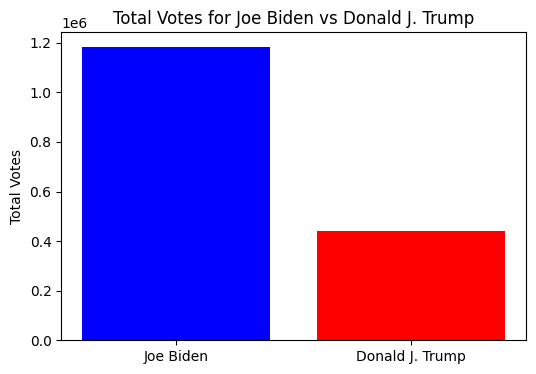

In [10]:
# Filter the dataset for votes for Joe Biden and Donald J. Trump
biden_votes = combined_df[combined_df['Candidate Name'] == 'Joe Biden']['Total Votes'].sum()
trump_votes = combined_df[combined_df['Candidate Name'] == 'Donald J. Trump']['Total Votes'].sum()

# Display the results
print(f"Total votes for Joe Biden: {biden_votes}")
print(f"Total votes for Donald J. Trump: {trump_votes}")

# You could also create a bar chart for better visualization
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(6, 4))
plt.bar(['Joe Biden', 'Donald J. Trump'], [biden_votes, trump_votes], color=['blue', 'red'])
plt.title("Total Votes for Joe Biden vs Donald J. Trump")
plt.ylabel("Total Votes")
plt.show()


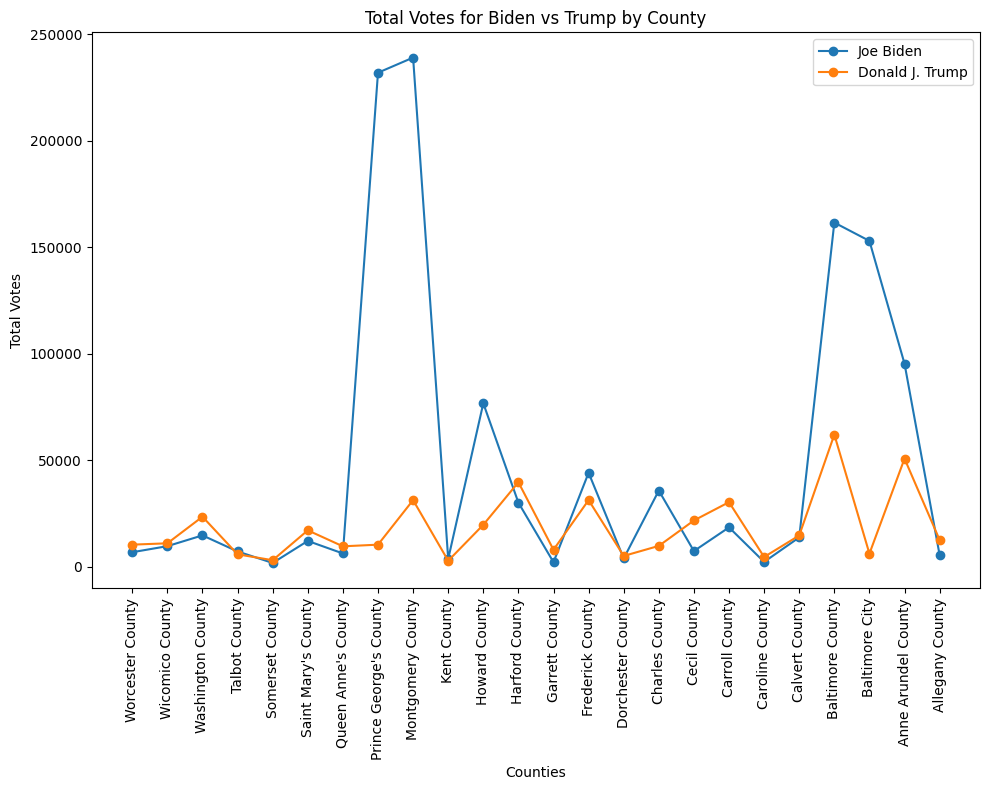

In [12]:


# Now filtering for the top candidates Joe Biden and Donald J. Trump
top_candidates = ['Joe Biden', 'Donald J. Trump']
filtered_results = combined_df[combined_df['Candidate Name'].isin(top_candidates)]

# Group by County Name and Candidate Name, then sum total votes
top_results_by_candidate_county = filtered_results.groupby(['County Name', 'Candidate Name'])['Total Votes'].sum().reset_index()

# Pivot the data to structure it for plotting
pivot_top_results = top_results_by_candidate_county.pivot(index='County Name', columns='Candidate Name', values='Total Votes')

# Plot the sideways line plot for Biden and Trump votes by county
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for candidate in top_candidates:
    plt.plot(pivot_top_results.index, pivot_top_results[candidate], marker='o', label=candidate)

plt.title("Total Votes for Biden vs Trump by County")
plt.xlabel("Counties")
plt.ylabel("Total Votes")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.gca().invert_xaxis()  # Make the plot sideways
plt.show()

